# Deep Learning for Beginners - Programming Exercises

by Aline Sindel, Katharina Breininger and Tobias Würfl

Pattern Recognition Lab, Friedrich-Alexander-University Erlangen-Nürnberg, Erlangen, Germany 
# Exercise 2



In [25]:
# minor set-up work
import numpy as np # we will definitely need this

# automatic reloading
%load_ext autoreload
%autoreload 2

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from scipy import ndimage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Image Filtering
<a id='network_description'></a>

Image processing software such as Photoshop provide predefined image filter to enhance images or modify its content. Linear, shift-invariant image filtering is the convolution of an image with a filter kernel.

<figure>
<img src="files/img/2D_convolution.gif" width="400">
<figcaption><center>Source: Vincent Dumoulin, Francesco Visin. A guide to convolution arithmetic for deep learning. https://arxiv.org/abs/1603.07285</center></figcaption>
</figure>

The above example shows the 2-D convolution of an image with a 2-D filter kernel. The kernel slides over the image and performs an element-wise multiplication of each pixel in the overlap area and then sums up the result, which is stored in the output image. Today, we will define our own filter kernels for the tasks of noise reduction and edge detection.


In [26]:
# %load src/filtering/image_basics.py
#some base functions - you do not have to change anything here
def norm_gray(img):
    gray = 0.30*img[:,:,0] + 0.59*img[:,:,1] + 0.11*img[:,:,2]
    gray = gray/255 #convert to [0,1]
    return gray

def generate_noisy_image(gray):
    noise = np.random.normal(0,.1,gray.shape[0]*gray.shape[1]).reshape(gray.shape[0],gray.shape[1])
    #zero center
    m = gray.mean()
    s = gray.std()
    gray = (gray-m)/s
    #add noise to zero centered img
    noisy = gray + noise
    #convert back
    gray = (gray*s)+m    
    return noisy

## Noise reduction

Smoothing filters can be applied to reduce the noise in images. We therefore, add noise to an image and compare the smoothing results by applying two different filter kernels.

### Implementation task

Implement the methods ```box_filter``` and ```gaussian_filter```. Define the 2-D filter kernels and convolve the image with the kernel. As a hint, for the convolution use the function from ```scipy.ndimage```. You can try out the filtering effect for the different images from the Set5 dataset$^1$.

$^1$ M. Bevilacqua et al. Low-Complexity Single-Image Super-Resolution based on Nonnegative Neighbor Embedding. In Proc. BMVC, 135.1--135.10, 2012.

In [27]:
# %%writefile src/filtering/smoothing.py
# %load src/filtering/smoothing_0.py
#----------------------------------
# Exercise: Smoothing filter
#----------------------------------
# The original python file can be reloaded by typing %load src/filtering/smoothing_0.py in the first line of this cell.
# After successfully solving this exercise, type the following command in the first line of this cell:
# %%writefile src/filtering/smoothing.py
# This will save the result to a python file, which you will need for the next exercises.

class SmoothingFilter():

    #define box filter, also called mean filter
    def box_filter(self, img):              
        m = (1 / 9.0) * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])        
        mean = ndimage.convolve(img, m)
        return mean

    #define gaussian smoothing filter
    def gaussian_filter(self, img):        
        b = (1 / 52.0) * np.array([[1, 1, 2, 1, 1],
                                  [1, 2, 4, 2, 1],
                                  [2, 4, 8, 4, 2],
                                  [1, 2, 4, 2, 1],
                                  [1, 1, 2, 1, 1]])
        blurred = ndimage.convolve(img, b)
        return blurred

In [28]:
# Running the testsuite
%run Tests/TestSmoothingFilter.py
import unittest
from Tests.TestSmoothingFilter import TestSmoothingFilter


TestSmoothingFilter.SmoothingFilter = SmoothingFilter
unittest.main(argv=['first-arg-is-ignored'], verbosity=2, exit=False)

test_gradient_edges (Tests.TestEdgeDetection.TestEdgeDetection) ... ok
test_sobel_edges (Tests.TestEdgeDetection.TestEdgeDetection) ... ok
test_box_filter (Tests.TestSmoothingFilter.TestSmoothingFilter) ... ok
test_gaussian_filter (Tests.TestSmoothingFilter.TestSmoothingFilter) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.012s

OK


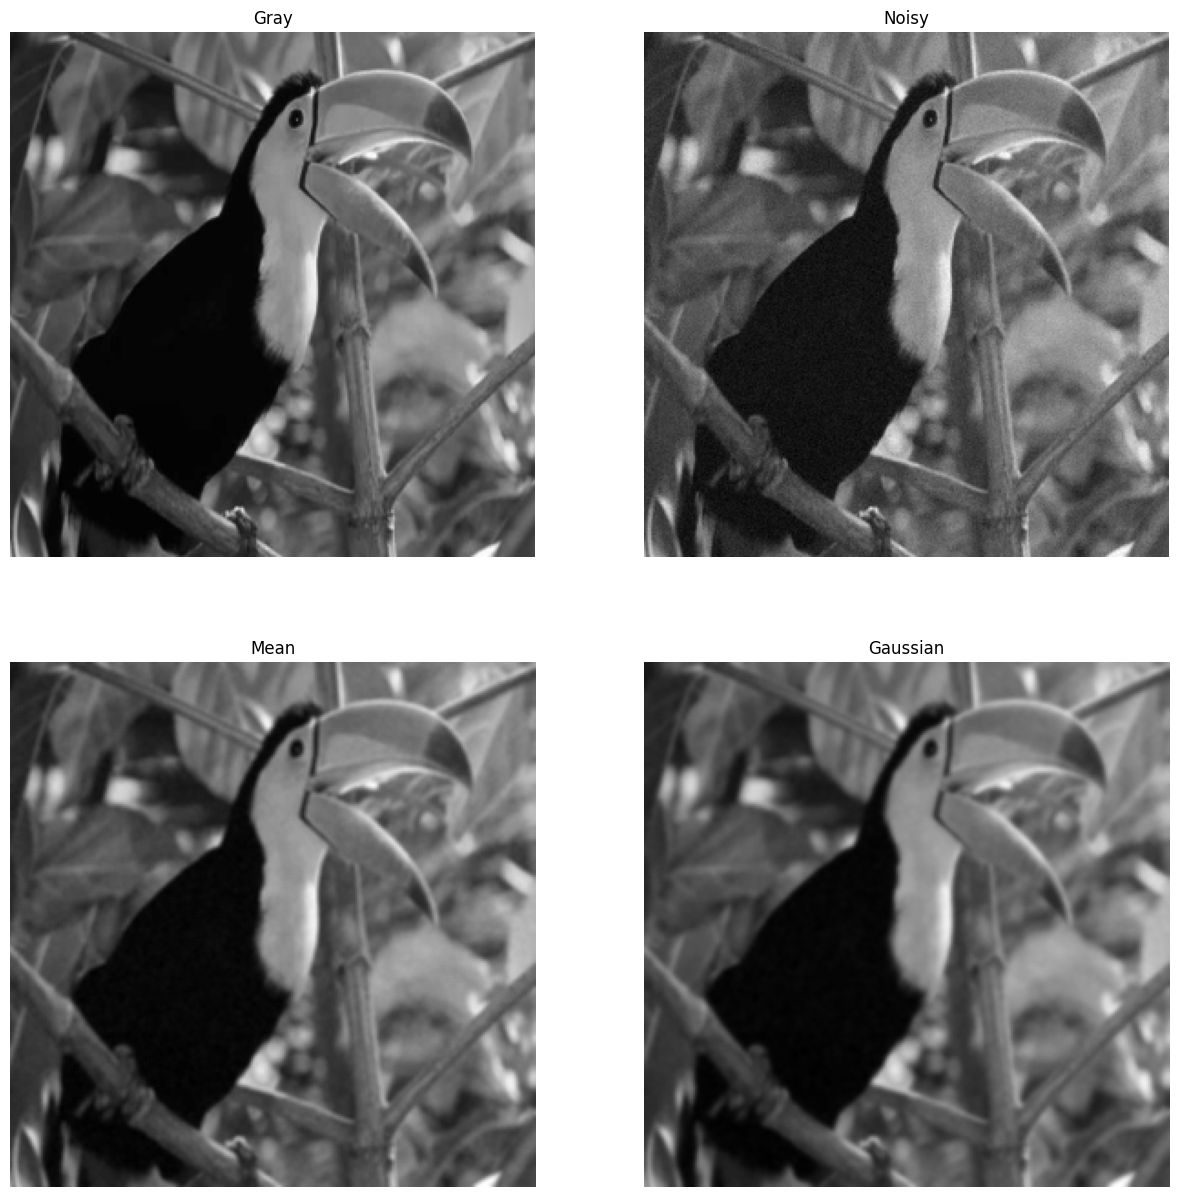

In [29]:
# %load src/filtering/apply_smoothing_filter.py
#read image
img = plt.imread('Set5/bird_GT.bmp')
#img = plt.imread('Set5/butterfly_GT.bmp')
#img = plt.imread('Set5/woman_GT.bmp')
#img = plt.imread('Set5/baby_GT.bmp')
#img = plt.imread('Set5/head_GT.bmp')

#normalize and convert to grayscale
gray = norm_gray(img)
#add noise
noisy = generate_noisy_image(gray)

#apply filters to noisy image
smoothFilter = SmoothingFilter()
mean = smoothFilter.box_filter(noisy)
blurred = smoothFilter.gaussian_filter(noisy)

#plotting
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Gray')
plt.axis('off')
fig.add_subplot(2,2,2)
plt.imshow(noisy, cmap='gray')
plt.title('Noisy')
plt.axis('off')
fig.add_subplot(2,2,3)
plt.imshow(mean, cmap='gray')
plt.title('Mean')
plt.axis('off')
fig.add_subplot(2,2,4)
plt.imshow(blurred, cmap='gray')
plt.title('Gaussian')
plt.axis('off')
plt.show()

## Edge Detection

Edges are characterized by a high intensity change in the image. Hence, we can use the gradient in x-direction and y-direction to find edges in the image. Computing the magnitude of the gradient of the image (in x-direction and y-direction) results in an edge image. The magnitude of the gradient is basically the L2-norm of the gradient.

1-D Kernels for the image gradient: 

\begin{equation}
k_x = \begin{pmatrix} {-1}&{0}&{1} \end{pmatrix}, k_y = 
\begin{pmatrix} 
  {-1}    \\ 
  {0} \\
  {1}
\end{pmatrix} 
\end{equation}

2-D Sobel filter is the combination of Gaussian smoothing and the gradient: 

\begin{equation}
s_x = \begin{pmatrix} 
  {1}    \\ 
  {2} \\
  {1}
\end{pmatrix} 
\begin{pmatrix} 
  {-1}&{0}&{1} \end{pmatrix} = 
\begin{pmatrix} 
{-1} & {0} & {1} \\
{-2} & {0} & {2} \\%
{-1} & {0} & {1}
\end{pmatrix}, s_y = 
\begin{pmatrix} 
{-1} & {-2} & {-1} \\
{0} & {0} & {0} \\%
{1} & {2} & {1}
\end{pmatrix}
\end{equation}





### Implementation task

Implement the method ```gradient_filter```, ```sobel_filter``` and ```compute_magnitude```. For ```gradient_filter``` and ```sobel_filter```, you have to define for each method the filter kernels in x- and y-direction and convolve the image with both kernels. Then, you can test your results. After that, apply the gradient filter to the image and compute the magnitude of both. Next, use the Sobel filter to compute the edge magnitude. Compare the visual results. Which one do you prefer?

In [30]:
# %%writefile src/filtering/edge_detection.py
# %load src/filtering/edge_detection_0.py
#----------------------------------
# Exercise: Edge Detection
#----------------------------------
# The original python file can be reloaded by typing %load src/filtering/edge_detection_0.py in the first line of this cell.
# After successfully solving this exercise, type the following command in the first line of this cell:
# %%writefile src/filtering/edge_detection.py
# This will save the result to a python file, which you will need for the next exercises.

class EdgeDetection():
    
    #compute gradient in x and y direction
    def gradient_filter(self,img):
        k_x = np.array([-1, 0, 1])
        k_y = np.array([-1, 0, 1]).transpose()
        gradient_x = ndimage.convolve1d(img, k_x, axis=0)
        gradient_y = ndimage.convolve1d(img, k_y, axis=1)
        return gradient_x, gradient_y
    
    #define sobel filter in x and y direction
    def sobel_filter(self,img):
        sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        sy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) 
        sobel_x = ndimage.convolve(img, sx)
        sobel_y = ndimage.convolve(img, sy)
        return sobel_x, sobel_y
    
    #compute magnitude of filtered image of both directions
    def compute_magnitude(self,x,y):
        magnitude = np.hypot(x,y)
        return magnitude

In [31]:
# Running the testsuite
%run Tests/TestEdgeDetection.py
from Tests.TestEdgeDetection import TestEdgeDetection


TestEdgeDetection.EdgeDetection = EdgeDetection
unittest.main(argv=['first-arg-is-ignored'], verbosity=2, exit=False)

test_gradient_edges (Tests.TestEdgeDetection.TestEdgeDetection) ... ok
test_sobel_edges (Tests.TestEdgeDetection.TestEdgeDetection) ... ok
test_box_filter (Tests.TestSmoothingFilter.TestSmoothingFilter) ... ok
test_gaussian_filter (Tests.TestSmoothingFilter.TestSmoothingFilter) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.013s

OK


<Figure size 640x480 with 0 Axes>

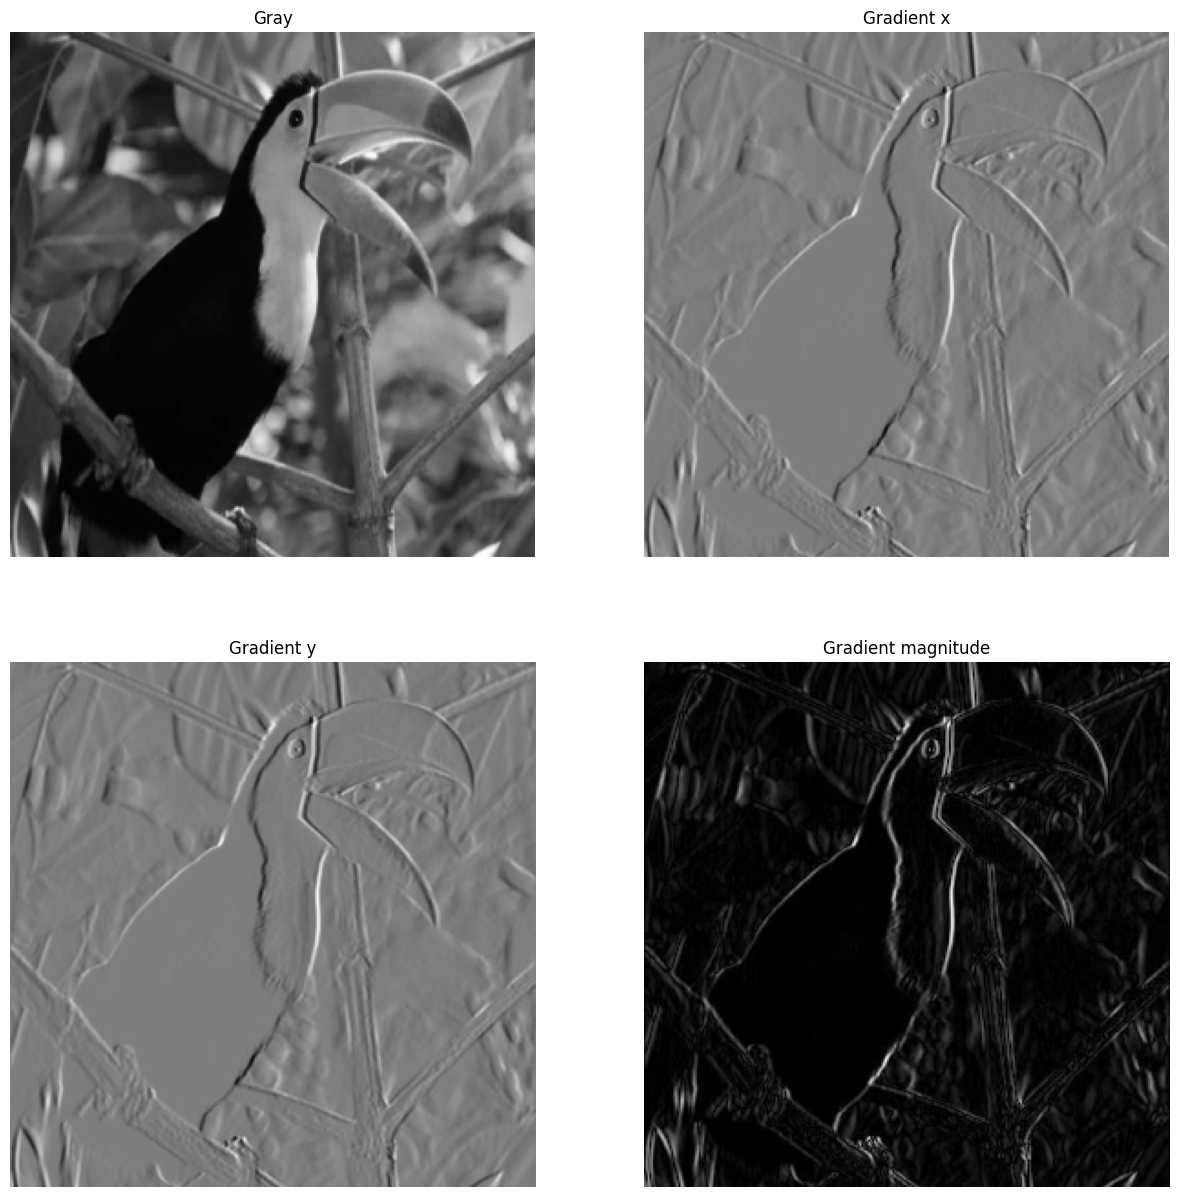

In [6]:
# %load src/filtering/apply_edge_detection_gradient.py
#read image
img = plt.imread('Set5/bird_GT.bmp')
#img = plt.imread('Set5/butterfly_GT.bmp')
#img = plt.imread('Set5/woman_GT.bmp')
#img = plt.imread('Set5/baby_GT.bmp')
#img = plt.imread('Set5/head_GT.bmp')

gray = norm_gray(img)

edgeDet = EdgeDetection()
gradient_x, gradient_y = edgeDet.gradient_filter(gray)
gradient_mag = edgeDet.compute_magnitude(gradient_x, gradient_y)

#plotting
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Gray')
plt.axis('off')
fig.add_subplot(2,2,2)
plt.imshow(gradient_x, cmap='gray')
plt.title('Gradient x')
plt.axis('off')
fig.add_subplot(2,2,3)
plt.imshow(gradient_y, cmap='gray')
plt.title('Gradient y')
plt.axis('off')
fig.add_subplot(2,2,4)
plt.imshow(gradient_mag, cmap='gray')
plt.title('Gradient magnitude')
plt.axis('off')
plt.show()

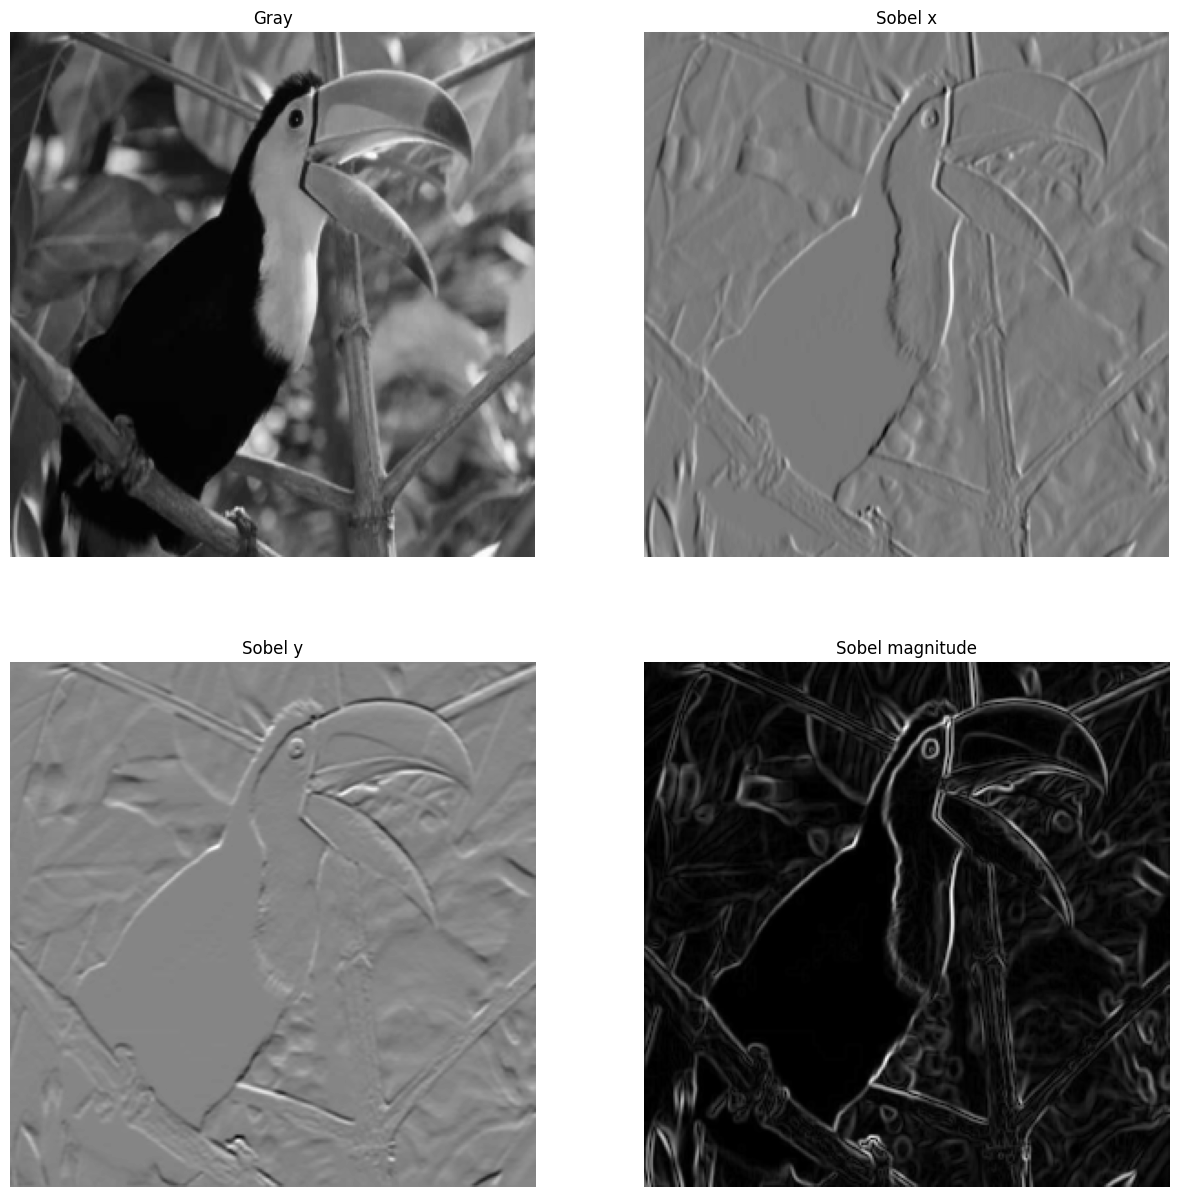

In [7]:
# %load src/filtering/apply_edge_detection_sobel.py
#read image
img = plt.imread('Set5/bird_GT.bmp')
#img = plt.imread('Set5/butterfly_GT.bmp')
#img = plt.imread('Set5/woman_GT.bmp')
#img = plt.imread('Set5/baby_GT.bmp')
#img = plt.imread('Set5/head_GT.bmp')

gray = norm_gray(img)

#sobel
edgeDet = EdgeDetection()
sobel_x, sobel_y = edgeDet.sobel_filter(gray)
sobel_mag = edgeDet.compute_magnitude(sobel_x, sobel_y)

#plotting
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Gray')
plt.axis('off')
fig.add_subplot(2,2,2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel x')
plt.axis('off')
fig.add_subplot(2,2,3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel y')
plt.axis('off')
fig.add_subplot(2,2,4)
plt.imshow(sobel_mag, cmap='gray')
plt.title('Sobel magnitude')
plt.axis('off')
plt.show()